In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Processing Data

In [2]:
dfRuns = pd.read_csv("Results.csv", encoding="utf-8")
dfRuns

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Run,Result
0,128,200,2,150,0.10,Precision,1,0.5940
1,128,200,2,150,0.10,Recall,1,0.5038
2,128,200,2,150,0.10,F1,1,0.5144
3,128,200,2,150,0.10,Precision,2,0.5851
4,128,200,2,150,0.10,Recall,2,0.4995
5,128,200,2,150,0.10,F1,2,0.5082
6,256,50,2,150,0.10,Precision,1,0.5793
7,256,50,2,150,0.10,Recall,1,0.4854
8,256,50,2,150,0.10,F1,1,0.4961
9,256,50,2,150,0.10,Precision,2,0.5778


In [3]:
dfAv = dfRuns.copy()
dfAv = dfAv.groupby(["RnnSize", "EmbSize", "RnnLayer", "Epochs", "Alpha", "Eval"]).agg({'Result': ['mean', 'std']})

In [4]:
dfAv

Result          
                                                    mean       std
RnnSize EmbSize RnnLayer Epochs Alpha Eval                        
128     200     2        150    0.10  F1         0.51130  0.004384
                                      Precision  0.58955  0.006293
                                      Recall     0.50165  0.003041
256     50      2        150    0.10  F1         0.49975  0.005162
                                      Precision  0.57855  0.001061
                                      Recall     0.49025  0.006859
        100     2        150    0.10  F1         0.48585  0.003182
                                      Precision  0.57985  0.001768
                                      Recall     0.46945  0.003889
        200     1        150    0.10  F1         0.52485  0.004313
                                      Precision  0.59160  0.001980
                                      Recall     0.52250  0.007212
                                0.15  F1         0.52505  0.008556
                                      Precision  0.58890  0.003111
                                      Recall     0.52285  0.011384
                                0.20  F1         0.53005  0.003323
                                      Precision  0.59065  0.000919
                                      Recall     0.52990  0.004808
                2        150    0.10  F1         0.50820  0.003253
                                      Precision  0.58625  0.006152
                                      Recall     0.49930  0.001697
                3        150    0.10  F1         0.49625  0.004455
                                      Precision  0.57945  0.004031
                                      Recall     0.48455  0.006859
512     200     2        150    0.10  F1         0.50980  0.006647
                                      Precision  0.58815  0.002616
                                      Recall     0.50180  0.008910

In [5]:
dfAv = dfAv.reset_index()
dfAv.columns = [' '.join(col).rstrip() for col in dfAv.columns.to_numpy()]
dfAv = dfAv.round({'Result mean': 2, 'Result std': 2})
dfAv

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Result mean,Result std
0,128,200,2,150,0.10,F1,0.51,0.00
1,128,200,2,150,0.10,Precision,0.59,0.01
2,128,200,2,150,0.10,Recall,0.50,0.00
3,256,50,2,150,0.10,F1,0.50,0.01
4,256,50,2,150,0.10,Precision,0.58,0.00
5,256,50,2,150,0.10,Recall,0.49,0.01
6,256,100,2,150,0.10,F1,0.49,0.00
7,256,100,2,150,0.10,Precision,0.58,0.00
8,256,100,2,150,0.10,Recall,0.47,0.00
9,256,200,1,150,0.10,F1,0.52,0.00


In [6]:
dfAv.to_csv("ResultsFinal.csv")

# Hyperparameter

## RNN-Hidden-Size-Experiments

In [7]:
dfRNNsize = dfAv.loc[(dfAv['EmbSize'] == 200) & (dfAv['RnnLayer'] == 2) & (dfAv['Epochs'] == 150) & (dfAv['Alpha'] == 0.1)]
dfRNNsize.sort_values(by=["Eval", "RnnSize"])

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Result mean,Result std
0,128,200,2,150,0.1,F1,0.51,0.00
18,256,200,2,150,0.1,F1,0.51,0.00
24,512,200,2,150,0.1,F1,0.51,0.01
1,128,200,2,150,0.1,Precision,0.59,0.01
19,256,200,2,150,0.1,Precision,0.59,0.01
25,512,200,2,150,0.1,Precision,0.59,0.00
2,128,200,2,150,0.1,Recall,0.50,0.00
20,256,200,2,150,0.1,Recall,0.50,0.00
26,512,200,2,150,0.1,Recall,0.50,0.01


## Embedding size

In [54]:
dfEmb = dfAv.loc[(dfAv['RnnSize'] == 256) & (dfAv['RnnLayer'] == 2) & (dfAv['Epochs'] == 150) & (dfAv['Alpha'] == 0.1)]
dfEmb.sort_values(by=["Eval", "EmbSize"])

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Result mean,Result std
3,256,50,2,150,0.1,F1,0.50,0.01
6,256,100,2,150,0.1,F1,0.49,0.00
18,256,200,2,150,0.1,F1,0.51,0.00
4,256,50,2,150,0.1,Precision,0.58,0.00
7,256,100,2,150,0.1,Precision,0.58,0.00
19,256,200,2,150,0.1,Precision,0.59,0.01
5,256,50,2,150,0.1,Recall,0.49,0.01
8,256,100,2,150,0.1,Recall,0.47,0.00
20,256,200,2,150,0.1,Recall,0.50,0.00


## RNN Layer

In [9]:
dfrnnLayer = dfAv.loc[(dfAv['EmbSize'] ==200) & (dfAv['RnnSize'] == 256) & (dfAv['Epochs'] == 150) & (dfAv['Alpha'] == 0.1)]
dfrnnLayer.sort_values(by=["Eval", "RnnLayer"])

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Result mean,Result std
9,256,200,1,150,0.1,F1,0.52,0.00
18,256,200,2,150,0.1,F1,0.51,0.00
21,256,200,3,150,0.1,F1,0.50,0.00
10,256,200,1,150,0.1,Precision,0.59,0.00
19,256,200,2,150,0.1,Precision,0.59,0.01
22,256,200,3,150,0.1,Precision,0.58,0.00
11,256,200,1,150,0.1,Recall,0.52,0.01
20,256,200,2,150,0.1,Recall,0.50,0.00
23,256,200,3,150,0.1,Recall,0.48,0.01


## Learning rate

In [10]:
dfalpha = dfAv.loc[(dfAv['EmbSize'] == 200) & (dfAv['RnnSize'] == 256) & (dfAv['Epochs'] == 150) & (dfAv['RnnLayer'] == 1)]
dfalpha.sort_values(by=["Eval", "Alpha"])

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Result mean,Result std
9,256,200,1,150,0.10,F1,0.52,0.00
12,256,200,1,150,0.15,F1,0.53,0.01
15,256,200,1,150,0.20,F1,0.53,0.00
10,256,200,1,150,0.10,Precision,0.59,0.00
13,256,200,1,150,0.15,Precision,0.59,0.00
16,256,200,1,150,0.20,Precision,0.59,0.00
11,256,200,1,150,0.10,Recall,0.52,0.01
14,256,200,1,150,0.15,Recall,0.52,0.01
17,256,200,1,150,0.20,Recall,0.53,0.00


## Best Model

In [51]:
dfBestSorted = dfAv.loc[(dfAv['Eval'] == "F1")].sort_values(by=['Result mean'], ascending=False)
dfBestSorted.head(2)

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Result mean,Result std
12,256,200,1,150,0.15,F1,0.53,0.01
15,256,200,1,150,0.20,F1,0.53,0.00


# Language

In [11]:
dfLang = pd.read_csv("ResultsLang.csv", encoding="utf-8")
dfLang

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Lang,Run,Result
0,256,200,1,150,0.2,Precision,English,1,0.5913
1,256,200,1,150,0.2,Recall,English,1,0.5333
2,256,200,1,150,0.2,F1,English,1,0.5324
3,256,200,1,150,0.2,Precision,English,2,0.5900
4,256,200,1,150,0.2,Recall,English,2,0.5265
5,256,200,1,150,0.2,F1,English,2,0.5277
6,256,200,1,150,0.2,Precision,German,1,0.5394
7,256,200,1,150,0.2,Recall,German,1,0.5266
8,256,200,1,150,0.2,F1,German,1,0.5293
9,256,200,1,150,0.2,Precision,German,2,0.5453


In [12]:
dfLangAv = dfLang.copy()
dfLangAv = dfLangAv.groupby(["RnnSize", "EmbSize", "RnnLayer", "Epochs", "Alpha", "Eval", "Lang"]).agg({'Result': ['mean', 'std']})

In [13]:
dfLangAv

Result          
                                                            mean       std
RnnSize EmbSize RnnLayer Epochs Alpha Eval      Lang                      
256     200     1        150    0.2   F1        Chinese  0.60735  0.003182
                                                English  0.53005  0.003323
                                                Finnish  0.54845  0.005162
                                                French   0.72130  0.004243
                                                German   0.53505  0.008132
                                                Italian  0.58055  0.002192
                                                Spanish  0.55800  0.001697
                                      Precision Chinese  0.59845  0.006152
                                                English  0.59065  0.000919
                                                Finnish  0.60390  0.003536
                                                French   0.73380  0.001131
                                                German   0.54235  0.004172
                                                Italian  0.60215  0.003465
                                                Spanish  0.61910  0.003394
                                      Recall    Chinese  0.62950  0.000000
                                                English  0.52990  0.004808
                                                Finnish  0.51645  0.009405
                                                French   0.71460  0.005798
                                                German   0.53440  0.011031
                                                Italian  0.56865  0.001768
                                                Spanish  0.52165  0.001768

In [14]:
dfLangAv = dfLangAv.reset_index()
dfLangAv.columns = [' '.join(col).rstrip() for col in dfLangAv.columns.to_numpy()]
dfLangAv = dfLangAv.round({'Result mean': 2, 'Result std': 2})
dfLangAv

,RnnSize,EmbSize,RnnLayer,Epochs,Alpha,Eval,Lang,Result mean,Result std
0,256,200,1,150,0.2,F1,Chinese,0.61,0.00
1,256,200,1,150,0.2,F1,English,0.53,0.00
2,256,200,1,150,0.2,F1,Finnish,0.55,0.01
3,256,200,1,150,0.2,F1,French,0.72,0.00
4,256,200,1,150,0.2,F1,German,0.54,0.01
5,256,200,1,150,0.2,F1,Italian,0.58,0.00
6,256,200,1,150,0.2,F1,Spanish,0.56,0.00
7,256,200,1,150,0.2,Precision,Chinese,0.60,0.01
8,256,200,1,150,0.2,Precision,English,0.59,0.00
9,256,200,1,150,0.2,Precision,Finnish,0.60,0.00


In [15]:
dfLangAv.to_csv("ResultsLangFinal.csv")

# Diagrams

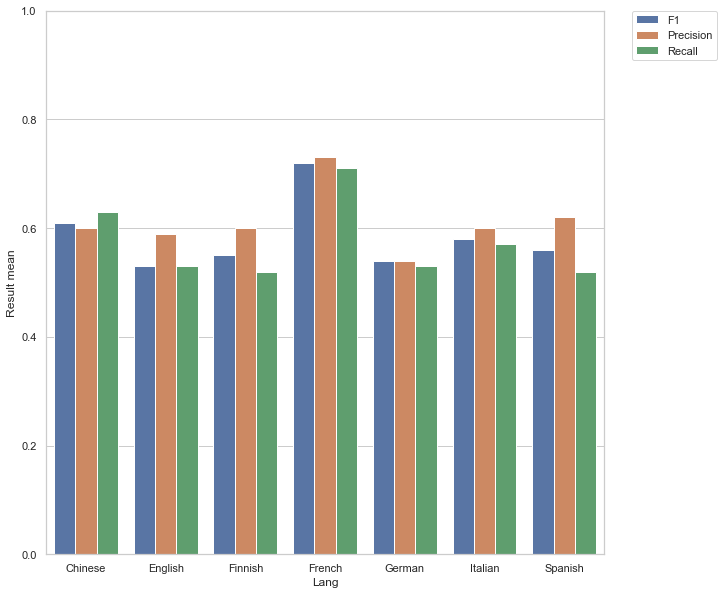

In [52]:
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
#dfLangF1 = dfLangAv[dfLangAv["Eval"]=="F1"]
fig = plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Lang", y="Result mean", hue="Eval", data=dfLangAv)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylim=(0.0, 1.0))

plt.savefig("eval_lng.png", dpi=300, bbox_inches='tight')

## RNN-Hidden Size

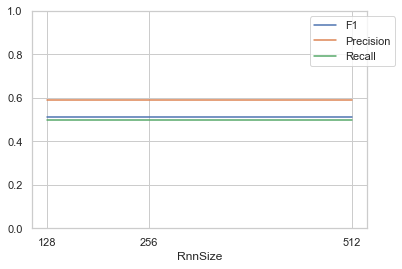

In [17]:
dfRNNsizePlot = dfRNNsize.pivot(index="RnnSize", values="Result mean", columns="Eval")
dfRNNsizePlot.plot(xticks=[128, 256, 512], ylim=(0.0, 1.0)).legend(bbox_to_anchor=(1.1, 1))

plt.savefig("eval_rnnhiddensize.png", dpi=300, bbox_inches='tight')

## Embedding Size

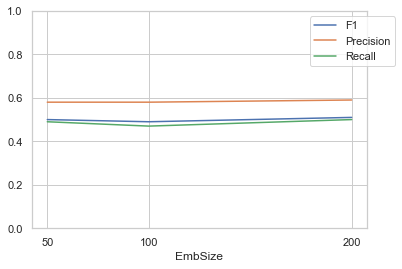

In [18]:
dfEmbPlot = dfEmb.pivot(index="EmbSize", values="Result mean", columns="Eval")
dfEmbPlot.plot(xticks=[50, 100, 200], ylim=(0.0, 1.0)).legend(bbox_to_anchor=(1.1, 1))

plt.savefig("eval_embsize.png", dpi=300, bbox_inches='tight')

## RNN-Layer

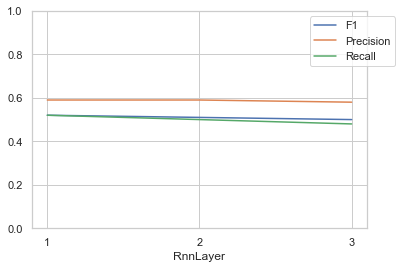

In [19]:
dfrnnLayerPlot = dfrnnLayer.pivot(index="RnnLayer", values="Result mean", columns="Eval")
dfrnnLayerPlot.plot(xticks=[1, 2, 3], ylim=(0.0, 1.0)).legend(bbox_to_anchor=(1.1, 1))

plt.savefig("eval_rnnlayer.png", dpi=300, bbox_inches='tight')

## Learning Rate

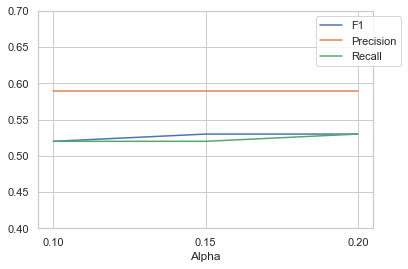

In [20]:
dfalphaPlot = dfalpha.pivot(index="Alpha", values="Result mean", columns="Eval")
dfalphaPlot.plot(xticks=[0.1, 0.15, 0.2], ylim=(0.4, 0.7)).legend(bbox_to_anchor=(1.1, 1))

plt.savefig("eval_alpha.png", dpi=300, bbox_inches='tight')

# Correlation?

## Preprocessing data

In [21]:
df1 = pd.read_csv("BAeval.csv", encoding="utf-8")
df2 = pd.read_csv("Exp.csv", encoding="utf-8")
df1 = df1.round({'Average': 2})
df1["Model"] = df1["ModelAlt"] + df1["SingleMulti"]
df1 = df1.drop(columns=['ModelAlt', 'SingleMulti'])

In [22]:
df1

,Eval,Lang,Average,Model
0,F1,German,0.62,flairMulti
1,F1,German,0.74,flairSingle
2,F1,German,0.72,bertMulti
3,F1,German,0.75,bertSingle
4,F1,German,0.78,robertaMulti
...,...,...,...,...
155,Accuracy,Finnish,0.97,flairSingle
156,Accuracy,Finnish,0.96,bertMulti
157,Accuracy,Finnish,0.96,bertSingle
158,Accuracy,Finnish,0.97,robertaMulti


In [23]:
df2

,Eval,Lang,Mean
0,F1,English,0.53
1,F1,French,0.72
2,F1,German,0.54
3,F1,Italian,0.58
4,F1,Spanish,0.56
5,Precision,English,0.59
6,Precision,French,0.73
7,Precision,German,0.54
8,Precision,Italian,0.60
9,Precision,Spanish,0.62


In [24]:
df3 = df2.merge(df1.pivot(index=['Eval', 'Lang'], columns='Model', values='Average').reset_index())

In [25]:
df3

,Eval,Lang,Mean,bertMulti,bertSingle,flairMulti,flairSingle,robertaMulti,robertaSingle
0,F1,English,0.53,0.84,0.85,0.80,0.86,0.87,0.86
1,F1,French,0.72,0.84,0.90,0.83,0.82,0.85,0.89
2,F1,German,0.54,0.72,0.75,0.62,0.74,0.78,0.73
3,F1,Italian,0.58,0.78,0.81,0.72,0.81,0.79,0.79
4,F1,Spanish,0.56,0.76,0.80,0.73,0.77,0.78,0.80
5,Precision,English,0.59,0.87,0.88,0.83,0.87,0.88,0.89
6,Precision,French,0.73,0.86,0.91,0.85,0.87,0.86,0.92
7,Precision,German,0.54,0.75,0.78,0.67,0.76,0.78,0.77
8,Precision,Italian,0.60,0.81,0.83,0.75,0.82,0.81,0.83
9,Precision,Spanish,0.62,0.79,0.82,0.79,0.80,0.80,0.83


## Results

In [26]:
df3.corr(method ='pearson')

,Mean,bertMulti,bertSingle,flairMulti,flairSingle,robertaMulti,robertaSingle
Mean,1.000000,0.543414,0.701369,0.620183,0.239144,0.017915,0.154598
bertMulti,0.543414,1.000000,0.941011,0.961961,0.885919,0.288566,0.364924
bertSingle,0.701369,0.941011,1.000000,0.956805,0.765712,0.068416,0.185901
flairMulti,0.620183,0.961961,0.956805,1.000000,0.827236,0.848401,0.983973
flairSingle,0.239144,0.885919,0.765712,0.827236,1.000000,0.863041,0.807104
robertaMulti,0.017915,0.288566,0.068416,0.848401,0.863041,1.000000,0.961618
robertaSingle,0.154598,0.364924,0.185901,0.983973,0.807104,0.961618,1.000000


In [27]:
# Notizen dazu:
# keine Korrelation für Roberta, keine für flairSingle
# bertMulti und flairMulti sind durchschnittlich korrelierend (bei der geringen Datenmenge eher Zufall)
# potentielle Korrelation für bertSingle, aber 0.7 bei den wenigen Daten ist auch nicht brillant

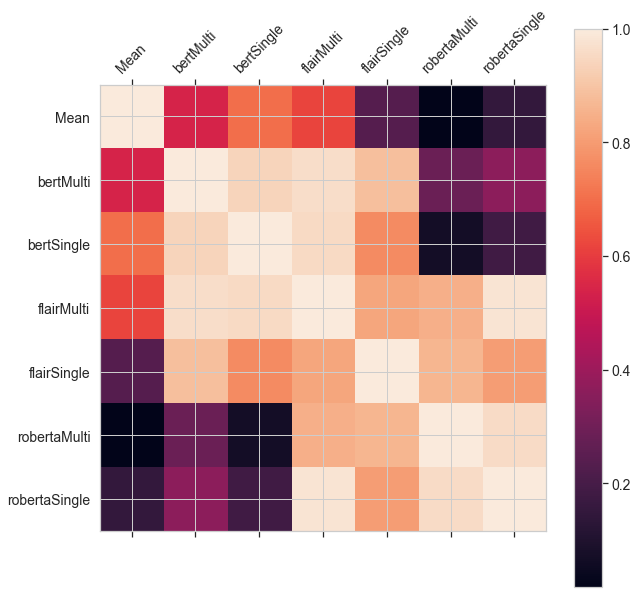

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr, fignum=fig.number)

plt.xticks(range(df3.select_dtypes(['number']).shape[1]), df3.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df3.select_dtypes(['number']).shape[1]), df3.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [38]:
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Mean,bertMulti,bertSingle,flairMulti,flairSingle,robertaMulti,robertaSingle
Mean,1.00,0.54,0.70,0.62,0.24,0.02,0.15
bertMulti,0.54,1.00,0.94,0.96,0.89,0.29,0.36
bertSingle,0.70,0.94,1.00,0.96,0.77,0.07,0.19
flairMulti,0.62,0.96,0.96,1.00,0.83,0.85,0.98
flairSingle,0.24,0.89,0.77,0.83,1.00,0.86,0.81
robertaMulti,0.02,0.29,0.07,0.85,0.86,1.00,0.96
robertaSingle,0.15,0.36,0.19,0.98,0.81,0.96,1.00
